In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import os

# List files to make sure the CSV is there
print(os.listdir('/kaggle/input/medical-cost-personal-datasets'))

# Load the CSV
df = pd.read_csv('/kaggle/input/medical-cost-personal-datasets/insurance.csv')

# Check first 5 rows safely
print(df.head())


['insurance.csv']
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print("Columns:", df.columns.tolist())

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [4]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}: {df[col].unique()}")

Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


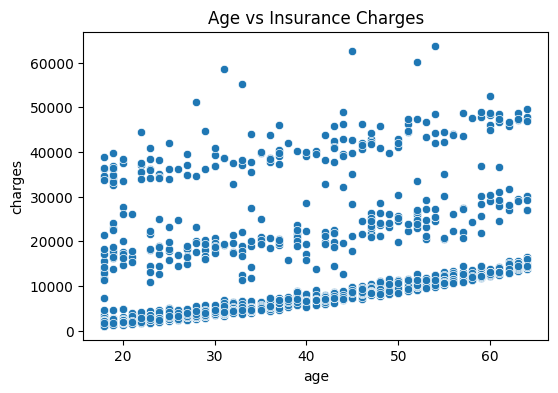

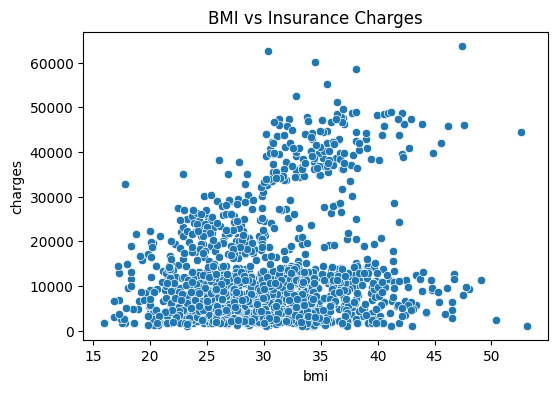

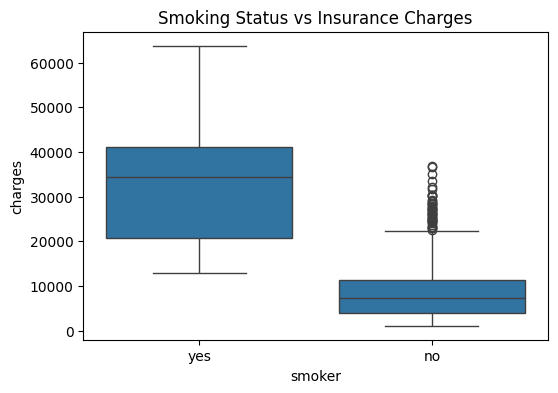

In [6]:
# Step 6: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Insurance Charges')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Insurance Charges')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoking Status vs Insurance Charges')
plt.show()

In [7]:
# Step 7: Prepare features and target
# Convert categorical variables (sex, smoker, region) to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('charges', axis=1)  # Features
y = df_encoded['charges']                # Target

In [8]:
# Step 8: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Step 9: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Step 10: Make predictions
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("\nMean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4181.19447375365
Root Mean Squared Error (RMSE): 5796.284659276273


In [12]:
# Step 12: Conclusion
print("\nConclusion:")
print("The Linear Regression model predicts medical insurance charges based on personal features.")
print("Features such as age, BMI, and smoker status have significant impact on charges.")


Conclusion:
The Linear Regression model predicts medical insurance charges based on personal features.
Features such as age, BMI, and smoker status have significant impact on charges.
